In [1]:
import time
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import additional_functions as af
import seaborn as sns
from model import CRAB_Model
seed_value = 12345678
random.seed(seed_value)
np.random.seed(seed=seed_value)

In [2]:
runs = 1
steps = 300
seeds = [0] 

In [3]:
micro_variables = []
macro_variables = []
for i, seed in enumerate(seeds):
    # print(("Model initialized with " + str(H) + " Households"))
    print("Run num", i, "with random seed", seed)

    tic = time.time()
    model = CRAB_Model(F1=50, F2=100, F3=100, H=3000,
                       flood_schedule={-100: 3, -140: 3},
                       fraction_exposed=0.4, cca_eff={"Elevation": 3,
                                                      "Wet_proof": 0.4,
                                                      "Dry_proof": 0.5},
                       flood_prob=1, av_network=7, social_int=True,
                       attributes='Hom',cca_model="PMT", 
                       collect_each=1, seed=seed)
    model.reset_randomizer(seed)

    for j in range(steps):
        print("#------------ step", j+1, "------------#")
        model.step()
    toc = time.time()
    runtime = toc - tic
    # runtimes.append(runtime)
    print("MODEL runtime: " + str(runtime))
    print()

    # # --------
    # # COMMENT:
    # # Look into efficient output saving later
    # # --------
    macro_variable = model.datacollector.get_model_vars_dataframe()
    # # Iteratively add dataframe to list
    macro_variables.append(macro_variable)
    micro_variable_hom = model.datacollector.get_agent_vars_dataframe()
    micro_variables.append(micro_variable_hom)

Run num 0 with random seed 0
#------------ step 1 ------------#
#------------ step 2 ------------#
#------------ step 3 ------------#
MODEL runtime: 1.9615132808685303



In [5]:
# select only Type hOUSEHOLD
micro_variables = [micro_variables[i][micro_variables[i].Type == "Household"] for i in range(len(micro_variables))]


Step  AgentID
0     1          False
      2          False
      3          False
      4          False
      5          False
                 ...  
3     3247        True
      3248        True
      3249        True
      3250        True
      3251       False
Name: Type, Length: 13004, dtype: bool

In [4]:
#micro_df = pd.concat(micro_variables)
#reindex = micro_df.reset_index(level=["Step"])
#micro_df.to_csv("micro_variables_net_7")
#macro = pd.concat(macro_variables)
#macro_variable.to_csv("macro_variables_net_7")
macro_variable = model.datacollector.get_model_vars_dataframe()

<AxesSubplot:>

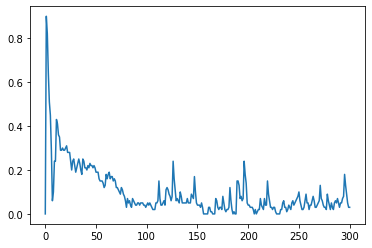

In [5]:
macro_variable['Unemployment rate coastal'].plot()

<AxesSubplot:>

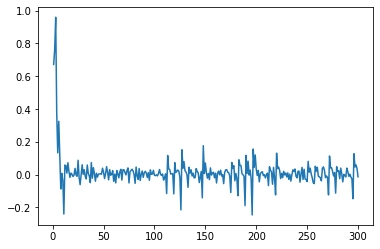

In [6]:
macro_variable['GDP total'].pct_change().plot()

<AxesSubplot:xlabel='Step', ylabel='House_value'>

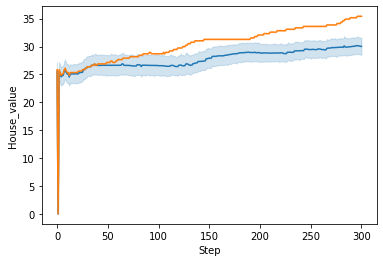

In [12]:
sns.lineplot(data = micro_variable, x = 'Step', y = 'House_value')
sns.lineplot(data = micro_variable_hom, x = 'Step', y = 'House_value')

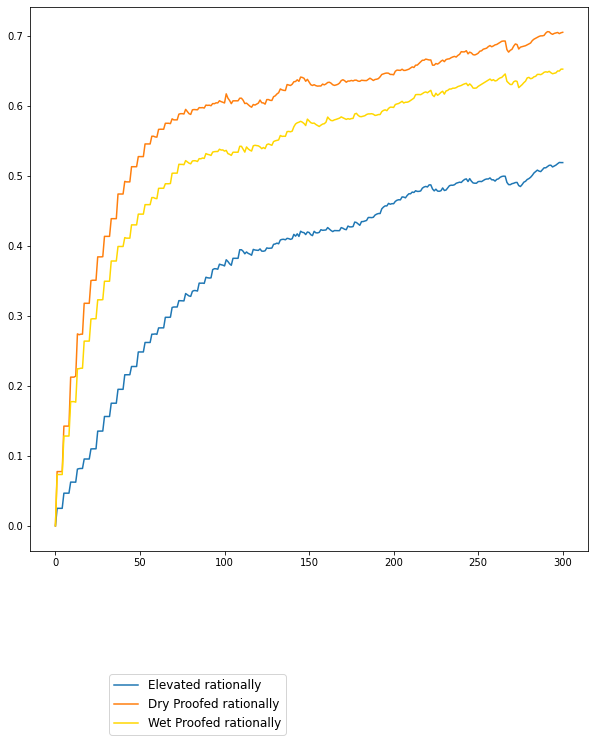

In [ ]:
data_cca = macro_variable #data_pmt_int
pop = data_cca["Households Coastal region"] * 0.4

#with plt.style.context(['science','no-latex','ieee']):
plt.figure(figsize=(10,10))
#ax = fig.add_subplot(#)
#plt.plot(data_cca['Total_UG_CCA_coastal_be'] / pop, label = "Adapted behaviorally")
plt.plot(data_cca['Total_UG_CCA_coastal_elev'] / pop, label = "Elevated rationally")
#plt.plot(data['Total_UG_CCA_coastal_des_elev'] / data['Population Households Coastal'],  label = "Desire to elevate rationally")
plt.plot(data_cca['Total_UG_CCA_coastal_dry_proof'] / pop, label = "Dry Proofed rationally")
plt.plot(data_cca['Total_UG_CCA_coastal_wet_proof'] /pop,  label = "Wet Proofed rationally", color = "gold")
plt.legend( loc='lower center', bbox_to_anchor =(0.3, -0.35), fontsize = 12)
